In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import lgamma

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

/var/folders/g9/q8qv40895cv4llyvvlj1b_380000gn/T/ipykernel_4146/3434535141.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return L / np.trapz(L, theta)


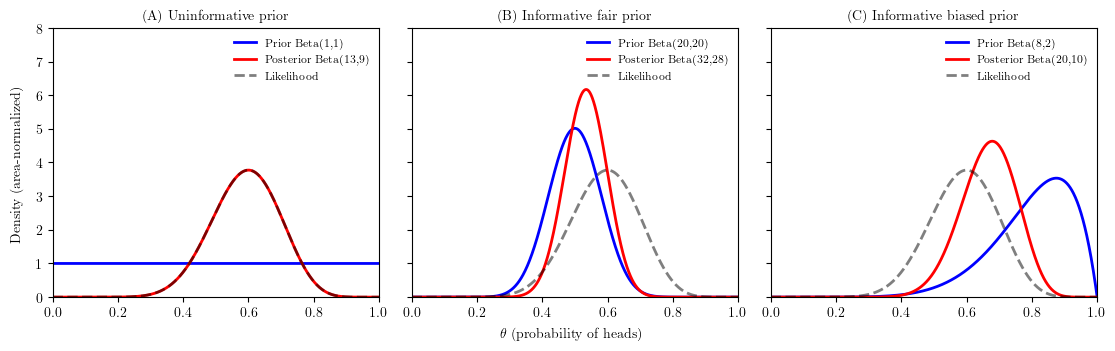

In [ ]:
def beta_pdf(x, a, b):
    logB = lgamma(a) + lgamma(b) - lgamma(a+b)
    logp = (a-1)*np.log(x) + (b-1)*np.log(1-x) - logB
    return np.exp(logp)

def posterior_params(alpha, beta, N, k):
    return alpha + k, beta + (N - k)

def normalized_likelihood(theta, N, k):
    logL = k*np.log(theta) + (N-k)*np.log(1-theta)
    L = np.exp(logL - np.max(logL))
    return L / np.trapz(L, theta)

N, k = 20, 12
theta = np.linspace(1e-6, 1-1e-6, 1200)
like = normalized_likelihood(theta, N, k)

scenarios = [
    ("A", "Uninformative prior", 1, 1),        # Beta(1,1)
    ("B", "Informative fair prior", 20, 20),   # Beta(20,20) mean 0.5
    ("C", "Informative biased prior", 8, 2),   # Beta(8,2) mean 0.8
]

fig, axes = plt.subplots(1, 3, figsize=(11, 3.4), sharex=True, sharey=True)

for ax, (panel, title, a0, b0) in zip(axes, scenarios):
    a_post, b_post = posterior_params(a0, b0, N, k)
    prior = beta_pdf(theta, a0, b0)
    post  = beta_pdf(theta, a_post, b_post)

    ax.plot(theta, prior, linewidth=2, label=f"Prior Beta({a0},{b0})", color='blue')
    ax.plot(theta, post,  linewidth=2, label=f"Posterior Beta({a_post},{b_post})", color='red')

    ax.plot(theta, like, linestyle="--", linewidth=2, alpha=0.5, label="Likelihood", color='black')


    ax.set_title(f"({panel}) {title}", pad=6, fontsize=10)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 8)
    ax.grid(False)
    ax.legend(frameon=False, fontsize=8)

fig.text(0.5, -0.01, r"$\theta$ (probability of heads)", ha="center")
fig.text(-0.01, 0.5, "Density (area-normalized)", va="center", rotation="vertical")
# fig.suptitle(f"Priors vs Posteriors for Coin Tosses (N={N}, k={k})", y=1.04, fontsize=12)

plt.tight_layout()
plt.show()

fig.savefig("../../../figs/models-vs-data/coin_priors_subplots.pdf", bbox_inches="tight", transparent=True)